# Esercitazione 0

Argomenti: manipolazione di vettori e matrici, grafici di funzioni, linguaggio Python


In [3]:
import numpy as np
import scipy.special
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import ipywidgets as widgets

eps = np.finfo(float).eps

## Esercizio 3

1. Definire la matrice $A=\left\lbrack \begin{array}{cccccc}
1 & 2 & 3 & 4 & 5 & 6\\
5 & 6 & 7 & 8 & 9 & 10\\
9 & 10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19 & 20
\end{array}\right\rbrack$
2. Costruire la matrice $B$ formata dalle colonne di $A$ disposte in ordine inverso (ossia, la prima colonna di $B$ è la sesta di $A$, la seconda di $B$ è la quinta di $A$...)
3. Costruire la matrice formata dalle sole colonne pari di $A$
4. Costruire la matrice formata dalle sole righe dispari di $A$
5. Costruire la matrice formata dalle righe 1, 4, 3 e dalle colonne 5, 2 di $A$
6. Costruire il vettore formato dagli elementi diagonali $a_{k,k}$ con $k \in \{1, \dots , 4\}$ di $A$


#### Parte 1

Definire la matrice

$A = \left\lbrack \begin{array}{cccccc}
1 & 2 & 3 & 4 & 5 & 6\\
5 & 6 & 7 & 8 & 9 & 10\\
9 & 10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19 & 20
\end{array}\right\rbrack$

##### Risoluzione

In [4]:
A = np.array([np.arange(1, 7),
              np.arange(5, 11),
              np.arange(9, 15),
              np.arange(15, 21)])
print(A)

[[ 1  2  3  4  5  6]
 [ 5  6  7  8  9 10]
 [ 9 10 11 12 13 14]
 [15 16 17 18 19 20]]


#### Parte 2

Costruire la matrice $B$ formata dalle colonne di $A$ disposte in ordine inverso (ossia, la prima colonna di $B$ è la sesta di $A$, la seconda di $B$ è la quinta di $A$...)

##### Risoluzione

In [5]:
B = A[:,:0:-1]
print(B)

[[ 6  5  4  3  2]
 [10  9  8  7  6]
 [14 13 12 11 10]
 [20 19 18 17 16]]


### Parte 3

Costruire la matrice formata dalle sole colonne pari di $A$

#### Risoluzione

In [6]:
APari = A[:,1::2]
print(APari)

[[ 2  4  6]
 [ 6  8 10]
 [10 12 14]
 [16 18 20]]


### Parte 4

Costruire la matrice formata dalle sole righe dispari di $A$

#### Risoluzione

In [7]:
ADispari = A[0::2,:]
print(ADispari)

[[ 1  2  3  4  5  6]
 [ 9 10 11 12 13 14]]


### Parte 5

Costruire la matrice formata dalle righe 1, 4, 3 e dalle colonne 5, 2 di $A$

#### Risoluzione

In [8]:
ARidotta = A[np.ix_([0,3,2],[4,1])]
print(ARidotta)

[[ 5  2]
 [19 16]
 [13 10]]


### Parte 6

Costruire il vettore formato dagli elementi diagonali $a_{k,k}$ con $k \in \{1, \dots, 4\}$ di $A$

#### Risoluzione

In [9]:
diagA = np.diag(A)
print(diagA)

[ 1  6 11 18]


## Esercizio 4

1. Utilizzare il comando diag di Python per definire la matrice tridiagonale $B$ di dimensione $10\times 10$, i cui elementi della diagonale principale sono tutti uguali a 5 e quelli delle codiagonali inferiore e superiore sono rispettivamente uguali a −1 e a 3
2. Quindi porre uguale a 2 gli elementi appartenenti all’intersezione delle colonne 6 e 9 e delle righe 5 e 8.

### Parte 1

Utilizzare il comando diag di Python per definire la matrice tridiagonale $B$ di dimensione $10\times 10$, i cui elementi della diagonale principale sono tutti uguali a 5 

#### Risoluzione

In [10]:
B1 = np.diag(5.0*np.ones((10)),0)
B2 = np.diag(3.0*np.ones(9),1);
B3 = np.diag(-1.0*np.ones(9),-1);
B = B1 + B2 + B3
print(B)

[[ 5.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  5.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  5.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  5.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  5.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  5.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  5.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  5.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  5.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  5.]]


### Parte 2
Quindi porre uguale a 2 gli elementi appartenenti all’intersezione delle colonne 6 e 9 e delle righe 5 e 8.

#### Risoluzione

In [11]:
B[np.ix_([4,7],[5,8])] = 2.0
print(B)

[[ 5.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  5.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  5.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  5.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  5.  2.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. -1.  5.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  5.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  2. -1.  5.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  5.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  5.]]


## Esercizio 5

1. Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=e^{-x^2 } \;\;\mathrm{con}-5\le x\le 5$$
2. Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=x\;\sin \left(\frac{1}{x}\right)\;\mathrm{con}\;\;0<x\le 2$$

### Parte 1

Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=e^{-x^2 } \;\;\mathrm{con}-5\le x\le 5$$

#### Risoluzione

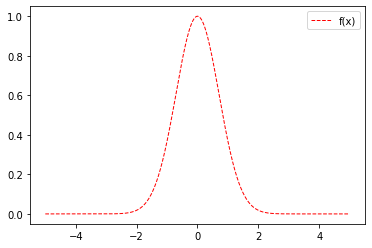

In [12]:
x = np.linspace(-5.0, 5.0, 1000)
f = lambda x: np.exp(-x**2)

plt.plot(x, f(x), label="f(x)", color='red', linewidth=1, linestyle='--')
plt.legend()
plt.show()


### Parte 2

Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=x\;\sin \left(\frac{1}{x}\right)\;\mathrm{con}\;\;0<x\le 2$$

#### Risoluzione

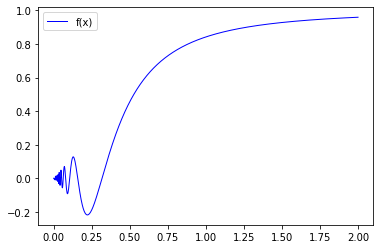

In [13]:
x = np.linspace(0.001, 2.0, 1000)
f = lambda x: x * np.sin(1 / x)

plt.plot(x, f(x), label="f(x)", color='blue', linewidth=1, linestyle='-')
plt.legend()

## Esercizio 6

Rappresentare graficamente la funzione mediante i comandi **plot** e **loglog** $$f\left(x\right)=\sqrt{\frac{100{\left(1-0\ldotp 01x^2 \right)}^2 +0\ldotp 02x^2 }{{\left(1-x^2 \right)}^2 +0\ldotp 1x^2 }\;}\;\mathrm{con}\;\;0\ldotp 1\le \;x\le 100\;$$

Valutare la funzione in un numero sufficientemente grande di punti appartenenti all’intervallo di interesse.
Quanti sono i massimi e minimi relativi della funzione nell’intervallo in questione?

### Risoluzione

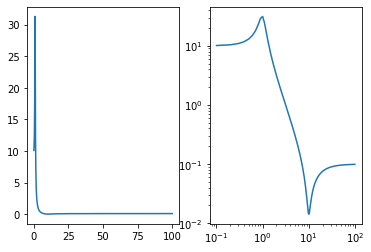

In [14]:
numberPoints = 1000

x = np.linspace(0.1, 100.0, numberPoints)
f = lambda x: np.sqrt((100.0 * (1.0 - 0.01 * x**2)**2 + 0.02 * x**2) / ((1.0-x**2)**2 + 0.1 * x**2))

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, f(x))
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].plot(x, f(x))


In caso si voglia trovare il valore del punto del massimo / minimo assoluto nel dominio in question è possibile farlo attraverso il seguente codice

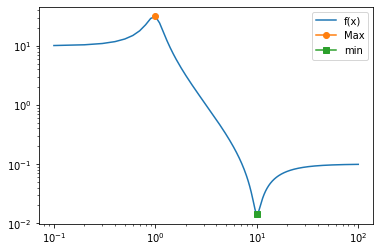

In [15]:
y = f(x)
M = np.max(y)
m = np.min(y)

posMax = np.nonzero(y == M)
posMin = np.nonzero(y == m)

fig, ax = plt.subplots()
ax.plot(x, y, label='f(x)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x[posMax], y[posMax], marker='o', label='Max')
ax.plot(x[posMin], y[posMin], marker='s', label='min')
ax.legend()


## Esercizio 8

1. Scrivere una function per approssimare il valore della funzione $f(x) = e^{x}$ in un intorno di $x= 0$ utilizzando il polinomio di Taylor di grado $n$ e centrato in $0$. $$e^x \approx 1 + x + \frac{x^2}{2!} + ... + \frac{x^n}{n!}$$ Si arresti la sommatoria quando il termine $\frac{x^i}{i!}$ è più piccolo di una tolleranza prefissata tol.
2. Si esegua la function per $x=1$ e $tol=1.0e^{-10}$ e si calcoli l’errore relativo associato al valore del polinomio in $x$, utilizzando come valore esatto quello fornito dalla funzione predefinita exp(x) di Python.

### Parte 1

Scrivere una function per approssimare il valore della funzione $f(x) = e^{x}$ in un intorno di $x= 0$ utilizzando il polinomio di Taylor di grado $n$ e centrato in $0$. $$e^x \approx 1 + x + \frac{x^2}{2!} + ... + \frac{x^n}{n!}$$ Si arresti la sommatoria 

#### Risoluzione

In [16]:
def taylor_exp(x, tol):
    '''
    :param x: punto in cui si vuole valutare il polinomio di Taylor
    :param tol: tolleranza prefissata
    :return: v valore del polinomio calcolato in x con tolleranza toll
    :return: i grado del polinomio
    '''
    v = 0
    i = 0
    termine_sviluppo = 1
    while termine_sviluppo >= tol:
        v += termine_sviluppo
        i += 1
        termine_sviluppo = x**i / scipy.special.factorial(i)
    
    return  [v, i]

### Parte 2

Si esegua la function per $x=1$ e $tol=1.0e^{-10}$ e si calcoli l’errore relativo associato al valore del polinomio in $x$, utilizzando come valore esatto quello fornito dalla funzione predefinita exp(x) di Python.

#### Risoluzione

In [17]:
x = 1.0

tol = 1.0e-10
[expApprossimata, terminiSviluppo] = taylor_exp(x, tol)

print("expApprossimata = {:.16e}".format(expApprossimata))
print("terminiSviluppo = {}".format(terminiSviluppo))

expPython = np.exp(x)
print("expPython = {:.16e}".format(expPython))

err = abs(expApprossimata - expPython) / abs(expPython)

print("err = {:.6e}".format(err))

expApprossimata = 2.7182818284467594e+00
terminiSviluppo = 14
expPython = 2.7182818284590451e+00
err = 4.519667e-12
